## rdd.DataFrame  vs pd.DataFrame

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("rdd.DataFrame vs pd.DataFrame") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
import pandas as pd
import numpy as np

from pyspark.sql import functions as F
from pyspark.sql.functions import col

#### Ceate DataFrame

In [353]:
d = {'A': [0, 1, 0],
     'B': [1, 0, 1],
     'C': [1, 0, 0]}

In [354]:
pd.DataFrame(d)

,A,B,C
0,0,1,1
1,1,0,0
2,0,1,0


In [375]:
spark.createDataFrame(np.array(list(d.values())).T.tolist(),list(d.keys())).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  0|  1|  1|
|  1|  0|  0|
|  0|  1|  0|
+---+---+---+



In [358]:
spark.createDataFrame(list(d.values()),list(d.keys())).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  0|  1|  0|
|  1|  0|  1|
|  1|  0|  0|
+---+---+---+



In [170]:
# def invert_dict(d):
#     return dict([(v, k) for k, v in d.items()])

# d = {'child1': 'parent1',
#      'child2': 'parent2',
#      }
# print(invert_dict(d))

In [171]:
# def invert_dict_nonunique(d):
#     newdict = {}
#     for k, v in d.items():
#         newdict.setdefault(v, []).append(k)
#     return newdict

# d = {'child1': 'parent1',
#      'child2': 'parent1',
#      'child3': 'parent2',
#      'child4': 'parent2',
#      }
# invert_dict_nonunique(d)

In [42]:
spark.sparkContext.parallelize([data]).toDF().show()

+---------+---------+---------+
|        A|        B|        C|
+---------+---------+---------+
|[0, 1, 0]|[1, 0, 1]|[1, 0, 0]|
+---------+---------+---------+



/Users/dt216661/spark/python/pyspark/sql/session.py:366: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [16]:
from pyspark.sql import SQLContext, Row

sc = spark.sparkContext
sc.parallelize([d]).map(lambda l: Row(**dict(l))).toDF().show()

+---------+---------+---------+
|        A|        B|        C|
+---------+---------+---------+
|[0, 1, 0]|[1, 0, 1]|[1, 0, 0]|
+---------+---------+---------+



In [380]:
my_list = [['a', 1, 2], ['b', 2,3],['c',3,4]]
col_name = ['A', 'B','C']

In [381]:
# caution for the columns=
pd.DataFrame(my_list,columns= col_name)

,A,B,C
0,a,1,2
1,b,2,3
2,c,3,4


In [382]:
pd.DataFrame(my_list, col_name)

,0,1,2
A,a,1,2
B,b,2,3
C,c,3,4


In [384]:
spark.createDataFrame(my_list, col_name).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



In [182]:
dp = pd.DataFrame(d)
dp.head()

,A,B,C
0,0,1,1
1,1,0,0
2,0,1,0


In [183]:
spark.createDataFrame(dp).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  0|  1|  1|
|  1|  0|  0|
|  0|  1|  0|
+---+---+---+



In [395]:
ds = spark.sparkContext\
          .parallelize(my_list)\
          .toDF(col_name)

In [396]:
ds.show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



In [397]:
ds.toDF(*col_name).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



In [399]:
my_list = [('a', 1, 2), ('b', 2, 3),('c', 3, 4)]
col_name = ['A', 'B', 'C']

In [405]:
ds = spark.sparkContext\
          .parallelize(my_list)\
          .toDF(col_name)

In [406]:
ds.show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



### Read .csv

In [12]:
# pd.DataFrame dp: DataFrame pandas
dp = pd.read_csv('data/Advertising.csv')

In [13]:
#rdd.DataFrame. dp: DataFrame spark 
ds = spark.read.csv(path='data/Advertising.csv',
#                sep=',',
#                encoding='UTF-8',
#                comment=None,
               header=True, 
               inferSchema=True)
# # PySaprk
# df = spark.read\
#           .options(header='true', inferschema='true')\
#           .csv("Advertising.csv")
# df.show(4)   #df.show() 
# PySaprk
#
# df = spark.read\
#           .options(header='true', inferschema='true')\
#           .csv("Advertising.csv")
# df.show(4)   #df.show()      

In [14]:
ds.columns

['TV', 'Radio', 'Newspaper', 'Sales']

In [15]:
name_list = ['TV', 'Sales']

In [16]:
dp[name_list].head(4)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5


In [18]:
ds[name_list].show(4)

+-----+-----+
|   TV|Sales|
+-----+-----+
|230.1| 22.1|
| 44.5| 10.4|
| 17.2|  9.3|
|151.5| 18.5|
+-----+-----+
only showing top 4 rows



### From .json

In [36]:
dp = pd.read_json("data/data_json.json")
ds = spark.read.json('data/data_json.json')

In [37]:
dp[['id','timestamp']].head(4)

,id,timestamp
0,2994551481,2019-02-28 17:23:52
1,2994551482,2019-02-28 17:23:52
2,2994551483,2019-02-28 17:23:52
3,2994551484,2019-02-28 17:23:52


In [38]:
ds[['id','timestamp']].show(4)

+----------+-------------------+
|        id|          timestamp|
+----------+-------------------+
|2994551481|2019-02-28 17:23:52|
|2994551482|2019-02-28 17:23:52|
|2994551483|2019-02-28 17:23:52|
|2994551484|2019-02-28 17:23:52|
+----------+-------------------+
only showing top 4 rows



#### First n rows

In [37]:
dp.head(4)  

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


In [39]:
ds.show(4)

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3|  9.3|
|151.5| 41.3|     58.5| 18.5|
+-----+-----+---------+-----+
only showing top 4 rows



#### Column name

In [40]:
dp.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [41]:
ds.columns

['TV', 'Radio', 'Newspaper', 'Sales']

#### data types

In [25]:
dp.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [42]:
ds.dtypes

[('TV', 'double'),
 ('Radio', 'double'),
 ('Newspaper', 'double'),
 ('Sales', 'double')]

#### Rename all columns

In [50]:
dp.columns = ['a','b','c','d']
dp.head(4)

,a,b,c,d
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


In [53]:
dp.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

In [54]:
ds.toDF('a','b','c','d').show(4)

+-----+----+----+----+
|    a|   b|   c|   d|
+-----+----+----+----+
|230.1|37.8|69.2|22.1|
| 44.5|39.3|45.1|10.4|
| 17.2|45.9|69.3| 9.3|
|151.5|41.3|58.5|18.5|
+-----+----+----+----+
only showing top 4 rows



#### Rename one or more columns

In [160]:
mapping = {'Newspaper':'C','Sales':'D'}
dp.rename(columns=mapping).head(4)

,TV,Radio,C,D
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


In [156]:
# dict playwith
my_lst = ds.columns
rev_subs = { k:v for k,v in mapping.items()}
[rev_subs.get(item,item)  for item in my_lst]
# list 
print(*my_lst)

TV Radio Newspaper Sales


In [157]:
new_names = [mapping.get(col,col)  for col in ds.columns]
ds.toDF(*new_names).show(4)

+-----+-----+----+----+
|   TV|Radio|   C|   D|
+-----+-----+----+----+
|230.1| 37.8|69.2|22.1|
| 44.5| 39.3|45.1|10.4|
| 17.2| 45.9|69.3| 9.3|
|151.5| 41.3|58.5|18.5|
+-----+-----+----+----+
only showing top 4 rows



In [169]:
print(*[[k,v] for k,v in mapping.items()])

['Newspaper', 'C'] ['Sales', 'D']


In [161]:
print(*mapping)

Newspaper Sales


In [158]:
ds.withColumnRenamed(*mapping).show(4)

+-----+-----+-----+-----+
|   TV|Radio|Sales|Sales|
+-----+-----+-----+-----+
|230.1| 37.8| 69.2| 22.1|
| 44.5| 39.3| 45.1| 10.4|
| 17.2| 45.9| 69.3|  9.3|
|151.5| 41.3| 58.5| 18.5|
+-----+-----+-----+-----+
only showing top 4 rows



In [69]:
ds.withColumnRenamed('Newspaper','Paper').show(4)

+-----+-----+-----+-----+
|   TV|Radio|Paper|Sales|
+-----+-----+-----+-----+
|230.1| 37.8| 69.2| 22.1|
| 44.5| 39.3| 45.1| 10.4|
| 17.2| 45.9| 69.3|  9.3|
|151.5| 41.3| 58.5| 18.5|
+-----+-----+-----+-----+
only showing top 4 rows



In [139]:
# data = spark.createDataFrame([(1,2,3), (3,4,5)], ['x1', 'x2','x3'])
# data.show()
# new_names = [("x1","x3"),("x2","x4")]
# data = data.select(list(
#        map(lambda old,new:F.col(old).alias(new),*zip(*new_names))
#        ))

# data.show()


#### drop column

In [188]:
drop_name = ['Newspaper','Sales']
dp.drop(drop_name,axis=1).head(4)

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3


In [190]:
ds.drop(*drop_name).show(4)

+-----+-----+
|   TV|Radio|
+-----+-----+
|230.1| 37.8|
| 44.5| 39.3|
| 17.2| 45.9|
|151.5| 41.3|
+-----+-----+
only showing top 4 rows



#### Fill null

In [255]:
my_list = [['a', 1,None], ['b', 2,3],['c',3,4]]
dp = pd.DataFrame(my_list,columns=['A', 'B','C'])
ds = spark.createDataFrame(my_list, ['A', 'B','C'])

In [256]:
dp

,A,B,C
0,a,1,NaN
1,b,2,3.0
2,c,3,4.0


In [258]:
dp.fillna(-999)

,A,B,C
0,a,1,-999.0
1,b,2,3.0
2,c,3,4.0


In [259]:
ds.show()

+---+---+----+
|  A|  B|   C|
+---+---+----+
|  a|  1|null|
|  b|  2|   3|
|  c|  3|   4|
+---+---+----+



In [260]:
ds.fillna(-999).show()

+---+---+----+
|  A|  B|   C|
+---+---+----+
|  a|  1|-999|
|  b|  2|   3|
|  c|  3|   4|
+---+---+----+



#### replace value

In [262]:
my_list = [['male', 1,2], ['female', 2,3],['female',3,4]]
dp = pd.DataFrame(my_list,columns=['A', 'B','C'])
ds = spark.createDataFrame(my_list, ['A', 'B','C'])

In [263]:
dp

,A,B,C
0,male,1,2
1,female,2,3
2,female,3,4


In [264]:
# caution: you need to chose specific col
dp.A.replace(['male', 'female'],[1, 0], inplace=True)
dp

,A,B,C
0,1,1,2
1,0,2,3
2,0,3,4


In [265]:
ds.show()

+------+---+---+
|     A|  B|  C|
+------+---+---+
|  male|  1|  2|
|female|  2|  3|
|female|  3|  4|
+------+---+---+



In [266]:
#caution: Mixed type replacements are not supported
ds.na.replace(['male','female'],['0','1']).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  0|  1|  2|
|  1|  2|  3|
|  1|  3|  4|
+---+---+---+



#### Filter

In [279]:
ds = spark.read.csv(path='Advertising.csv',
                    header=True, 
                    inferSchema=True)
dp = pd.read_csv('Advertising.csv')

In [280]:
#filtering
dp[dp.Newspaper<20].head(4)

,TV,Radio,Newspaper,Sales
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
11,214.7,24.0,4.0,17.4
13,97.5,7.6,7.2,9.7


In [281]:
ds[ds.Newspaper<20].show(4)

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|120.2| 19.6|     11.6| 13.2|
|  8.6|  2.1|      1.0|  4.8|
|214.7| 24.0|      4.0| 17.4|
| 97.5|  7.6|      7.2|  9.7|
+-----+-----+---------+-----+
only showing top 4 rows



In [282]:
dp[(dp.Newspaper<20)&(dp.TV>100)].head(4)

,TV,Radio,Newspaper,Sales
7,120.2,19.6,11.6,13.2
11,214.7,24.0,4.0,17.4
19,147.3,23.9,19.1,14.6
25,262.9,3.5,19.5,12.0


In [283]:
ds[(ds.Newspaper<20)&(ds.TV>100)].show(4)

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|120.2| 19.6|     11.6| 13.2|
|214.7| 24.0|      4.0| 17.4|
|147.3| 23.9|     19.1| 14.6|
|262.9|  3.5|     19.5| 12.0|
+-----+-----+---------+-----+
only showing top 4 rows



#### with new col

In [289]:
ds = spark.read.csv(path='Advertising.csv',
                    header=True, 
                    inferSchema=True)
dp = pd.read_csv('Advertising.csv')

In [290]:
dp['tv_norm'] = dp.TV/sum(dp.TV)
dp.head(4)

,TV,Radio,Newspaper,Sales,tv_norm
0,230.1,37.8,69.2,22.1,0.007824
1,44.5,39.3,45.1,10.4,0.001513
2,17.2,45.9,69.3,9.3,0.000585
3,151.5,41.3,58.5,18.5,0.005152


In [291]:
ds.withColumn('tv_norm', ds.TV/ds.groupBy().agg(F.sum("TV")).collect()[0][0]).show(4)

+-----+-----+---------+-----+--------------------+
|   TV|Radio|Newspaper|Sales|             tv_norm|
+-----+-----+---------+-----+--------------------+
|230.1| 37.8|     69.2| 22.1|0.007824268493802813|
| 44.5| 39.3|     45.1| 10.4|0.001513167961643...|
| 17.2| 45.9|     69.3|  9.3|5.848649200061207E-4|
|151.5| 41.3|     58.5| 18.5|0.005151571824472517|
+-----+-----+---------+-----+--------------------+
only showing top 4 rows



In [293]:
dp['cond'] = dp.apply(lambda c: 1 if ((c.TV>100)&(c.Radio<40)) else 2 if c.Sales> 10 else 3,axis=1)
dp.head(4)

,TV,Radio,Newspaper,Sales,tv_norm,cond
0,230.1,37.8,69.2,22.1,0.007824,1
1,44.5,39.3,45.1,10.4,0.001513,2
2,17.2,45.9,69.3,9.3,0.000585,3
3,151.5,41.3,58.5,18.5,0.005152,2


In [295]:
ds.withColumn('cond',F.when((ds.TV>100)&(ds.Radio<40),1)\
                      .when(ds.Sales>10, 2)\
                      .otherwise(3)).show(4)

+-----+-----+---------+-----+----+
|   TV|Radio|Newspaper|Sales|cond|
+-----+-----+---------+-----+----+
|230.1| 37.8|     69.2| 22.1|   1|
| 44.5| 39.3|     45.1| 10.4|   2|
| 17.2| 45.9|     69.3|  9.3|   3|
|151.5| 41.3|     58.5| 18.5|   2|
+-----+-----+---------+-----+----+
only showing top 4 rows



In [297]:
dp['log_tv'] = np.log(dp.TV)
dp.head(4)

,TV,Radio,Newspaper,Sales,tv_norm,cond,log_tv
0,230.1,37.8,69.2,22.1,0.007824,1,5.438514
1,44.5,39.3,45.1,10.4,0.001513,2,3.795489
2,17.2,45.9,69.3,9.3,0.000585,3,2.844909
3,151.5,41.3,58.5,18.5,0.005152,2,5.020586


In [299]:
from pyspark.sql import functions as F
ds.withColumn('log_tv',F.log(ds.TV)).show(4)

+-----+-----+---------+-----+------------------+
|   TV|Radio|Newspaper|Sales|            log_tv|
+-----+-----+---------+-----+------------------+
|230.1| 37.8|     69.2| 22.1|  5.43851399704132|
| 44.5| 39.3|     45.1| 10.4|3.7954891891721947|
| 17.2| 45.9|     69.3|  9.3|2.8449093838194073|
|151.5| 41.3|     58.5| 18.5| 5.020585624949423|
+-----+-----+---------+-----+------------------+
only showing top 4 rows



In [113]:
df['tv+10'] = df.TV.apply(lambda x: x+10)
df.head(4)

,TV,Radio,Newspaper,Sales,tv+10
0,230.1,37.8,69.2,22.1,240.1
1,44.5,39.3,45.1,10.4,54.5
2,17.2,45.9,69.3,9.3,27.2
3,151.5,41.3,58.5,18.5,161.5


In [300]:
ds.withColumn('tv+10', ds.TV+10).show(4)

+-----+-----+---------+-----+-----+
|   TV|Radio|Newspaper|Sales|tv+10|
+-----+-----+---------+-----+-----+
|230.1| 37.8|     69.2| 22.1|240.1|
| 44.5| 39.3|     45.1| 10.4| 54.5|
| 17.2| 45.9|     69.3|  9.3| 27.2|
|151.5| 41.3|     58.5| 18.5|161.5|
+-----+-----+---------+-----+-----+
only showing top 4 rows



In [117]:
from pyspark.sql.types import DoubleType
myFn = F.udf(lambda x: x+10, DoubleType())
df.withColumn('tv+10', myFn(df.TV)).show(4)

+-----+-----+---------+-----+-----+
|   TV|Radio|Newspaper|Sales|tv+10|
+-----+-----+---------+-----+-----+
|230.1| 37.8|     69.2| 22.1|240.1|
| 44.5| 39.3|     45.1| 10.4| 54.5|
| 17.2| 45.9|     69.3|  9.3| 27.2|
|151.5| 41.3|     58.5| 18.5|161.5|
+-----+-----+---------+-----+-----+
only showing top 4 rows



#### join

In [305]:
leftp = dp[['TV', 'Radio', 'Newspaper']]
rightp = dp[['TV','Sales']]

In [306]:
lefts = ds[['TV', 'Radio', 'Newspaper']]
rights = ds[['TV','Sales']]

In [307]:
leftp.merge(rightp, on='TV').head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,17.2,45.9,69.3,5.9


In [310]:
lefts.join(rights, on='TV').show(4)

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3|  5.9|
| 17.2| 45.9|     69.3|  9.3|
+-----+-----+---------+-----+
only showing top 4 rows



In [309]:
leftp.merge(rightp, left_on='TV',right_on='TV').head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,17.2,45.9,69.3,5.9


In [312]:
lefts.join(rights,lefts.TV==rights.TV , how='left').show(4)

+-----+-----+---------+-----+-----+
|   TV|Radio|Newspaper|   TV|Sales|
+-----+-----+---------+-----+-----+
|230.1| 37.8|     69.2|230.1| 22.1|
| 44.5| 39.3|     45.1| 44.5| 10.4|
| 17.2| 45.9|     69.3| 17.2|  5.9|
| 17.2| 45.9|     69.3| 17.2|  9.3|
+-----+-----+---------+-----+-----+
only showing top 4 rows



In [4]:
leftp = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
                    
rightp = pd.DataFrame({'A': ['A0', 'A1', 'A6', 'A7'],
                       'F': ['B4', 'B5', 'B6', 'B7'],
                       'G': ['C4', 'C5', 'C6', 'C7'],
                       'H': ['D4', 'D5', 'D6', 'D7']},
                       index=[4, 5, 6, 7])

lefts = spark.createDataFrame(leftp)  
rights = spark.createDataFrame(rightp)

In [10]:
leftp

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [12]:
lefts.show()

+---+---+---+---+
|  A|  B|  C|  D|
+---+---+---+---+
| A0| B0| C0| D0|
| A1| B1| C1| D1|
| A2| B2| C2| D2|
| A3| B3| C3| D3|
+---+---+---+---+



In [13]:
rightp

,A,F,G,H
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [14]:
rights.show()

+---+---+---+---+
|  A|  F|  G|  H|
+---+---+---+---+
| A0| B4| C4| D4|
| A1| B5| C5| D5|
| A6| B6| C6| D6|
| A7| B7| C7| D7|
+---+---+---+---+



#### Left join

In [6]:
leftp.merge(rightp,on='A',how='left')

,A,B,C,D,F,G,H
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN


In [7]:
lefts.join(rights,on='A',how='left').orderBy('A',ascending=True).show()

+---+---+---+---+----+----+----+
|  A|  B|  C|  D|   F|   G|   H|
+---+---+---+---+----+----+----+
| A0| B0| C0| D0|  B4|  C4|  D4|
| A1| B1| C1| D1|  B5|  C5|  D5|
| A2| B2| C2| D2|null|null|null|
| A3| B3| C3| D3|null|null|null|
+---+---+---+---+----+----+----+



#### right join

In [8]:
leftp.merge(rightp,on='A',how='right')

,A,B,C,D,F,G,H
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A6,NaN,NaN,NaN,B6,C6,D6
3,A7,NaN,NaN,NaN,B7,C7,D7


In [9]:
lefts.join(rights,on='A',how='right').orderBy('A',ascending=True).show()

+---+----+----+----+---+---+---+
|  A|   B|   C|   D|  F|  G|  H|
+---+----+----+----+---+---+---+
| A0|  B0|  C0|  D0| B4| C4| D4|
| A1|  B1|  C1|  D1| B5| C5| D5|
| A6|null|null|null| B6| C6| D6|
| A7|null|null|null| B7| C7| D7|
+---+----+----+----+---+---+---+



#### Inner join

In [15]:
leftp.merge(rightp,on='A',how='inner')

,A,B,C,D,F,G,H
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5


In [16]:
lefts.join(rights,on='A',how='inner').show()

+---+---+---+---+---+---+---+
|  A|  B|  C|  D|  F|  G|  H|
+---+---+---+---+---+---+---+
| A0| B0| C0| D0| B4| C4| D4|
| A1| B1| C1| D1| B5| C5| D5|
+---+---+---+---+---+---+---+



#### Full join

In [17]:
leftp.merge(rightp,on='A',how='outer')

,A,B,C,D,F,G,H
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN
4,A6,NaN,NaN,NaN,B6,C6,D6
5,A7,NaN,NaN,NaN,B7,C7,D7


In [18]:
lefts.join(rights,on='A',how='full').orderBy('A').show()

+---+----+----+----+----+----+----+
|  A|   B|   C|   D|   F|   G|   H|
+---+----+----+----+----+----+----+
| A0|  B0|  C0|  D0|  B4|  C4|  D4|
| A1|  B1|  C1|  D1|  B5|  C5|  D5|
| A2|  B2|  C2|  D2|null|null|null|
| A3|  B3|  C3|  D3|null|null|null|
| A6|null|null|null|  B6|  C6|  D6|
| A7|null|null|null|  B7|  C7|  D7|
+---+----+----+----+----+----+----+



### concat cols

In [41]:
my_list = [('a', 2, 3),
           ('b', 5, 6),
           ('c', 8, 9),
           ('a', 2, 3),
           ('b', 5, 6),
           ('c', 8, 9)]
col_name = ['col1', 'col2', 'col3']

In [42]:
dp = pd.DataFrame(my_list,columns=col_name)

In [322]:
ds = spark.sparkContext\
          .parallelize(my_list)\
          .toDF(col_name)

In [330]:
dp

,col1,col2,col3
0,a,2,3
1,b,5,6
2,c,8,9
3,a,2,3
4,b,5,6
5,c,8,9


In [344]:
dp['concat'] = dp.apply(lambda x:'%s%s'%(x['col1'],x['col2']),axis=1)
dp.head(4)

,col1,col2,col3,concat
0,a,2,3,a2
1,b,5,6,b5
2,c,8,9,c8
3,a,2,3,a2


In [345]:
dp['concat'] = dp[['col1','col2']].apply(lambda x: ''.join(x.astype(str)), axis=1)
dp.head(4)

,col1,col2,col3,concat
0,a,2,3,a2
1,b,5,6,b5
2,c,8,9,c8
3,a,2,3,a2


In [323]:
from pyspark.sql import functions as F
ds.withColumn('concat',F.concat('col1','col2')).show()

+----+----+----+------+
|col1|col2|col3|concat|
+----+----+----+------+
|   a|   2|   3|    a2|
|   b|   5|   6|    b5|
|   c|   8|   9|    c8|
|   a|   2|   3|    a2|
|   b|   5|   6|    b5|
|   c|   8|   9|    c8|
+----+----+----+------+



#### GroupBy 

In [347]:
dp.groupby(['col1']).agg({'col2':'min','col3':'mean'})

,col2,col3
col1,,
a,2,3
b,5,6
c,8,9


In [348]:
ds.groupBy(['col1']).agg({'col2': 'min', 'col3': 'avg'}).show()

+----+---------+---------+
|col1|min(col2)|avg(col3)|
+----+---------+---------+
|   c|        8|      9.0|
|   b|        5|      6.0|
|   a|        2|      3.0|
+----+---------+---------+



####  Pivot

In [350]:
pd.pivot_table(dp, values='col3', index='col1', columns='col2', aggfunc=np.sum)

col2,2,5,8
col1,,,
a,6.0,NaN,NaN
b,NaN,12.0,NaN
c,NaN,NaN,18.0


In [352]:
ds.groupBy(['col1']).pivot('col2').sum('col3').show()

+----+----+----+----+
|col1|   2|   5|   8|
+----+----+----+----+
|   c|null|null|  18|
|   b|null|  12|null|
|   a|   6|null|null|
+----+----+----+----+



### Bar Processing

In [2]:
import time
import seaborn as sns
from tqdm import tqdm

for inx, val in enumerate(tqdm(range(10))):
    time.sleep(3)

100%|██████████| 10/10 [00:30<00:00,  3.01s/it]


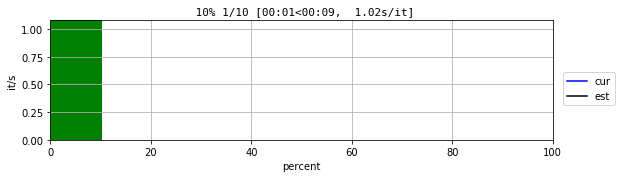

In [8]:
import time
from tqdm import tqdm_gui
for i in tqdm_gui(range(10)):
    time.sleep(1)

### Sql

In [6]:
my_list = [('a', 2, 3),
           ('b', 5, 6),
           ('c', 8, 9),
           ('a', 2, 3),
           ('b', 5, 6),
           ('c', 8, 9)]
col_name = ['col1', 'col2', 'col3']

In [7]:
dp = pd.DataFrame(my_list,columns=col_name)

In [8]:
ds = spark.createDataFrame(dp)

### Confidentiality

In [40]:
#pd.DataFrame(os.environ.items())

In [37]:
#import getpass
#print(getpass.getuser())
#print(getpass.getpass())

import os
print(os.environ['USER'])
print(os.environ['USER_PASSWORD'])

dt216661
dt216661
Welcome1!


### Date.time

In [16]:
T = 5
from datetime import datetime
from time import localtime, strftime
now = strftime("%m-%d-%Y", localtime())

days = pd.date_range(now, periods= T+1,freq='B').date

In [47]:
days

array([datetime.date(2019, 3, 1), datetime.date(2019, 3, 4),
       datetime.date(2019, 3, 5), datetime.date(2019, 3, 6),
       datetime.date(2019, 3, 7), datetime.date(2019, 3, 8)], dtype=object)

In [ ]:
dp = pd.DataFrame(days)

In [18]:
spark.createDataFrame(dp).show()

+----------+
|         0|
+----------+
|2019-03-01|
|2019-03-04|
|2019-03-05|
|2019-03-06|
|2019-03-07|
|2019-03-08|
+----------+



In [6]:
my_list = [['a', int("1284101485")], ['b', int("2284101485")],['c', int("3284101485")]]
col_name = ['A', 'ts']

In [7]:
from datetime import datetime

dp = pd.DataFrame(my_list,columns=col_name)
ds = spark.createDataFrame(dp)

In [8]:
dp

,A,ts
0,a,1284101485
1,b,2284101485
2,c,3284101485


In [44]:
dp['datetime'] = pd.to_datetime(dp['ts'], unit='s').dt.tz_localize('UTC')
dp

,A,ts,datetime
0,a,1284101485,2010-09-10 06:51:25+00:00
1,b,2284101485,2042-05-19 08:38:05+00:00
2,c,3284101485,2074-01-25 10:24:45+00:00


In [42]:
spark.conf.set("spark.sql.session.timeZone", "UTC")
from pyspark.sql.types import DateType
ds.withColumn('date', F.from_unixtime('ts')).show() #.cast(DateType())

+---+----------+-------------------+
|  A|        ts|               date|
+---+----------+-------------------+
|  a|1284101485|2010-09-10 06:51:25|
|  b|2284101485|2042-05-19 08:38:05|
|  c|3284101485|2074-01-25 10:24:45|
+---+----------+-------------------+



### Replace Data type

In [44]:
my_list = [('a', 2, 3),
           ('b', 5, 6),
           ('c', 8, 9),
           ('a', 2, 3),
           ('b', 5, 6),
           ('c', 8, 9)]
col_name = ['col1', 'col2', 'col3']

In [45]:
dp = pd.DataFrame(my_list,columns=col_name)
ds = spark.createDataFrame(dp)

In [46]:
dp.dtypes

col1    object
col2     int64
col3     int64
dtype: object

In [47]:
ds.dtypes

[('col1', 'string'), ('col2', 'bigint'), ('col3', 'bigint')]

In [48]:
d = {'col2': 'string','col3':'string'}

In [55]:
ds = ds.select(*list(set(ds.columns)-set(d.keys())),
               *(col(c[0]).astype(c[1]).alias(c[0]) for c in d.items()))
ds.dtypes

[('col1', 'string'), ('col2', 'string'), ('col3', 'string')]

In [35]:
dp = dp.astype({'col2': 'str','col3':'str'})

In [32]:
dp.dtypes

col1    object
col2    object
col3    object
dtype: object